In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes=True)

The dataset consists of banking information and loan defaults from Taiwan.
The primary goal of this analysis was to build classification models to predict the risk of default based on the dataset variables.
Datapoints include the amount of the loans, demographics about the individual lenders including age, sex, education, marital status and age, as well as bill amounts and repayment habits.
The first part of this work is to examine the data for trends and characterize the dataset.
A second part of the analysis was completed to exclusively model the data.


EXPLORATORY DATA ANALYSIS


In [2]:
#load dataset from csv file and view header and first lines
#original as-loaded data is called dfraw
dfraw = pd.read_csv('creditf.csv')
print('Table of credit dataset')
dfraw.head()

Table of credit dataset


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DFNM
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Details about the dataset -
Sex : 1= male, 2= female
Education: 1= grad school, 2= university, 3= HS, 4= other
Married: 1= married, 2= singe, 3= divorced
Age: integer value, age
Pay columns by month : -1 paiad on-time, 1= delay 1 month, 2= delay for 2 months, 
    8= delay for 8 months, 9= delay of 9 months and greater
Bill Amt columns: integer value, amount of payment
DFNM: default 0= no, 1= yes

In [3]:
#clean up dataset - remove ID column
#dfraw=dfraw.drop(['ID'],axis=1)

In [4]:
#convert some integer columns to categorical data
dfraw['SEX'] = dfraw['SEX'].astype('category')
dfraw['EDUCATION'] = dfraw['EDUCATION'].astype('category')
dfraw['MARRIAGE'] = dfraw['MARRIAGE'].astype('category')
dfraw['PAY_0'] = dfraw['PAY_0'].astype('category')
dfraw['PAY_2'] = dfraw['PAY_2'].astype('category')
dfraw['PAY_3'] = dfraw['PAY_3'].astype('category')
dfraw['PAY_4'] = dfraw['PAY_4'].astype('category')
dfraw['PAY_5'] = dfraw['PAY_5'].astype('category')
dfraw['PAY_6'] = dfraw['PAY_6'].astype('category')

Basic visualizations of the dataset

Text(0.5,1,'Boxplot of Loan Values by Sex')

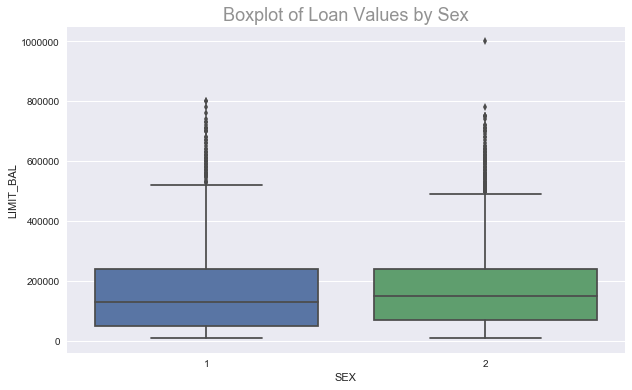

In [5]:
#boxplot of Loan Values by Sex
g=sns.boxplot(x=dfraw['SEX'],y=dfraw['LIMIT_BAL'],orient='v')
g.figure.set_size_inches(10,6)
g.axes.set_title('Boxplot of Loan Values by Sex', fontsize=18,alpha=0.5)

A simple boxplot by sex reveals little other than, on average, loans given to the female population are slightly higher but the fourth quartile and interquartile range for males is slightly larger than for females.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Histogram of Loan Values')

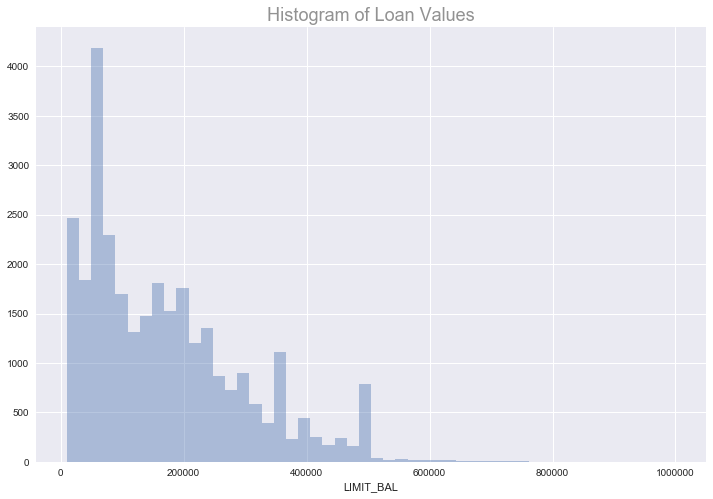

In [6]:
#Histogram of Loan Values
g=sns.distplot(dfraw['LIMIT_BAL'],bins=50,kde=False)
g.figure.set_size_inches(12,8)
g.axes.set_title('Histogram of Loan Values', fontsize=18,alpha=0.5)

The loan values histogram shows the most common loan values on the low end of the scale but with a very long skew to much higher values.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Histogram of Ages')

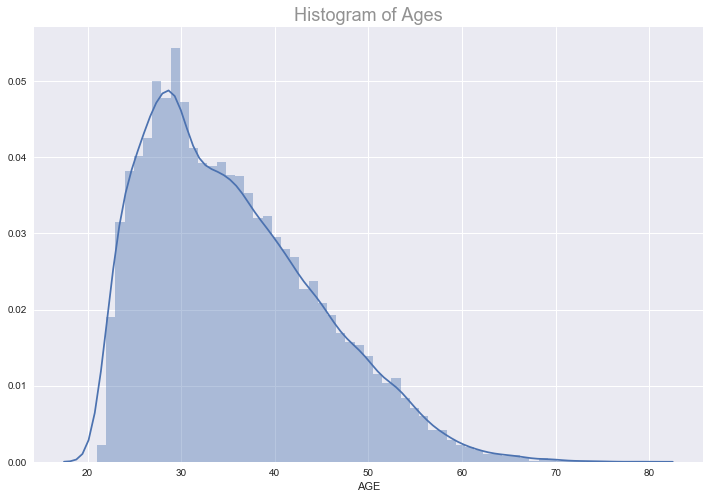

In [7]:
#Histogram showing distribution of ages
g=sns.distplot(dfraw['AGE'],bins=59)
g.figure.set_size_inches(12,8)
g.axes.set_title('Histogram of Ages', fontsize=18,alpha=0.5)

Likewise, this histogram shows the most popular age for loans is 29, but with a very long tail to the older population.

In [8]:
#determine total number of individuals by sex in each age bracket
#create new dataframe called ages
ages = dfraw.groupby(['AGE','SEX'])

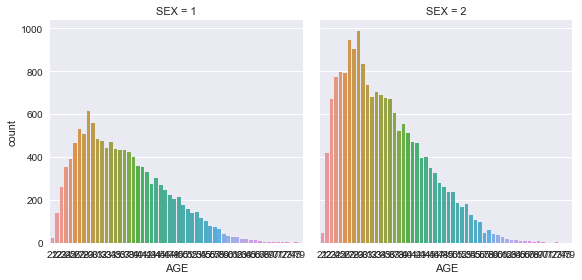

In [11]:
#Number of Loans by Sex
g=sns.factorplot('AGE',col='SEX',kind='count',data=dfraw)

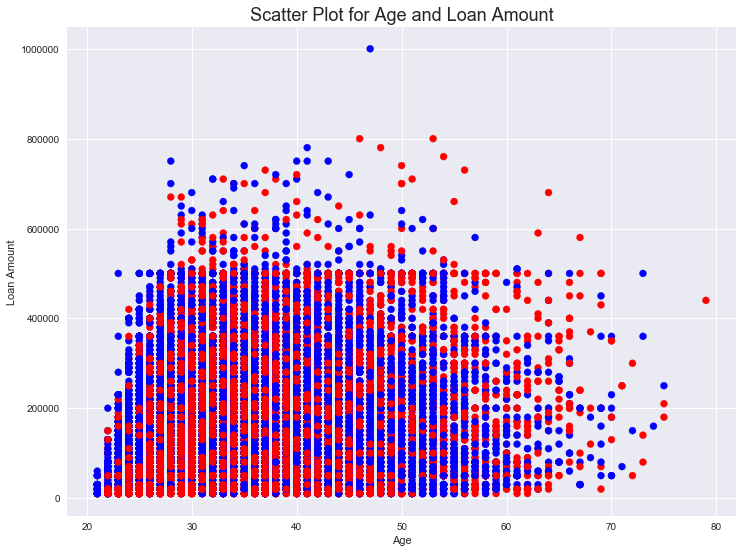

In [12]:
#Scatter plot showing loan amounts by age
plt.figure(figsize=(12,9))
c_p = {1: 'blue', 2:'red'}
colors = [c_p[c] for c in dfraw['SEX']]
age=(dfraw['AGE'])
amt=(dfraw['LIMIT_BAL'])
plt.title('Scatter Plot for Age and Loan Amount',fontsize=18)
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.scatter(age,amt, c=colors)
plt.show()

Loan amount plotted by age (color coded by sex: blue = male and red = female) shows a scattering of loan amounts across the ages with fewer loans above approximately 60 years, but a spread of loan amounts across most of the range.

Text(0.5,0.98,'')

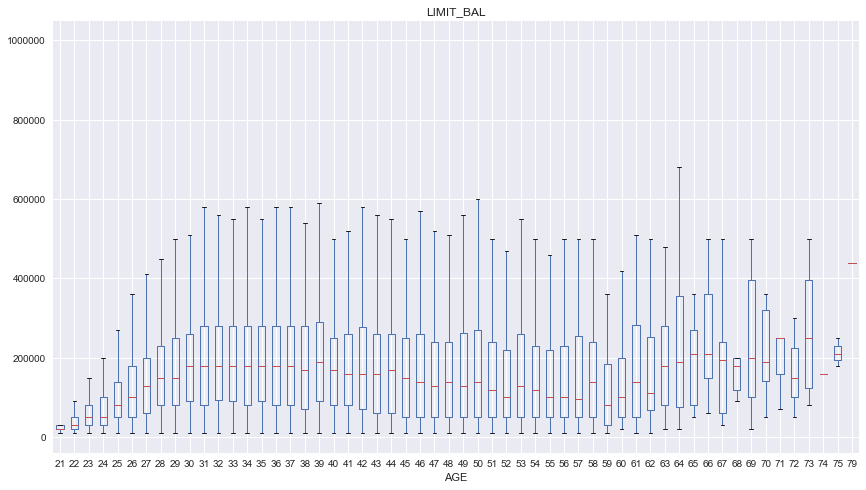

In [16]:
#Boxplot showing distribution of loan amounts by age
plt.rcParams["figure.figsize"] = (14,8)
plt.suptitle('')
dfraw.boxplot(column='LIMIT_BAL',by='AGE')

A boxplot was constructed to compare the loan amount distributions by individual ages. Inspection immediately shows that a single loan of 1 million was made, two loans at 800k, a fair number between 600k and 800k. The average amounts vary primarily between 100k and 200k. On average, smaller loans are given to the youngest people through about age 30 where the distribution levels out somewhat. There are a number of individuals over 70 years old taking out loans.


Build tables and examine default rates


In [24]:
#determine percent of defaults by age in each sex bracket
#create new dataframe called defrate
defrate=pd.pivot_table(dfraw, values='DFNM', index=['AGE','SEX'])
print(defrate)

             DFNM
AGE SEX          
21  1    0.238095
    2    0.195652
22  1    0.345324
    2    0.287411
23  1    0.284615
    2    0.257824
24  1    0.295775
    2    0.252591
25  1    0.279487
    2    0.242462
26  1    0.221983
    2    0.189394
27  1    0.211720
    2    0.212025
28  1    0.207510
    2    0.200443
29  1    0.207455
    2    0.187247
30  1    0.221034
    2    0.179856
31  1    0.221532
    2    0.166213
32  1    0.214286
    2    0.180352
33  1    0.192308
    2    0.184659
34  1    0.224576
    2    0.181159
35  1    0.236239
    2    0.181684
...           ...
61  1    0.392857
    2    0.357143
62  1    0.074074
    2    0.294118
63  1    0.222222
    2    0.307692
64  1    0.250000
    2    0.333333
65  1    0.285714
    2    0.100000
66  1    0.266667
    2    0.300000
67  1    0.333333
    2    0.285714
68  1    0.333333
    2    0.000000
69  1    0.166667
    2    0.222222
70  1    0.250000
    2    0.166667
71  1    0.000000
    2    0.000000
72  1    0

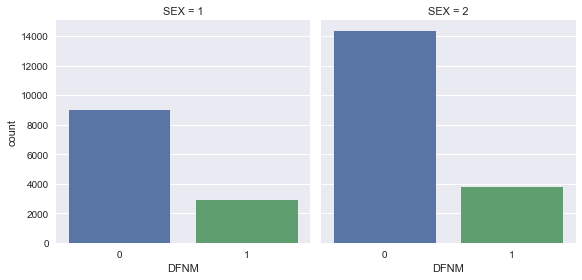

In [18]:
#Number of defaults by Sex
g=sns.factorplot('DFNM',col='SEX',kind='count',data=dfraw)

Text(0.5,0.98,'')

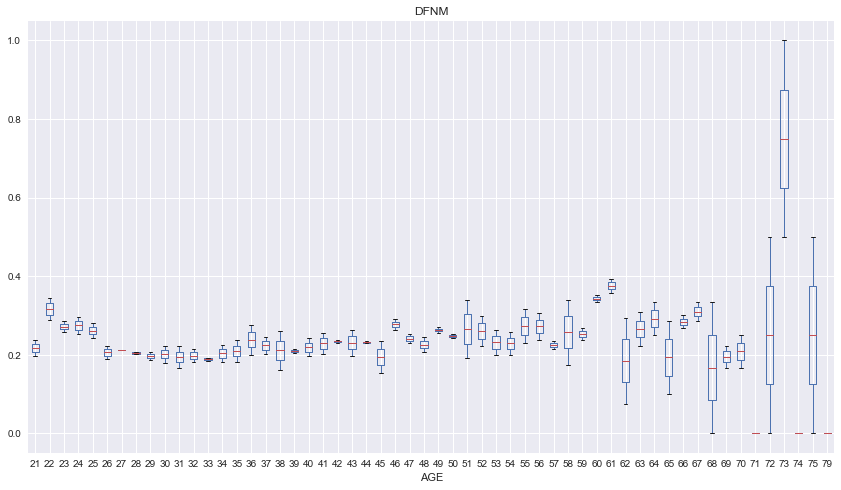

In [25]:
#Create boxplot to show defaults rate by sex at each age
plt.rcParams["figure.figsize"] = (14,8)
defrate.boxplot('DFNM','AGE')
plt.suptitle('')

This plot show the default rates by age and (indirectly) sex.

In [26]:
c_p = {1: 'red', 2:'blue'}
colors = [c_p[c] for c in defrate['SEX']]
defrate.plot.scatter(x='AGE', y='DFNM',c=colors)

KeyError: 'SEX'

Examining default rate by age and sex shows that through approximately age 50 with few exceptions, males typically have slight higher rates of default. The data become more difficult to interpret above age 65 or so due to the small numbers of individuals in those categories. Defaults are 0, 50 or 100% with pools of only a few people in each.
In general, the shape of the curve is roughly concave with lower default rates in the middle and higher rates at the youngest and oldest ages (through about 60).

In [27]:
#determine total number of defaults by age in each sex bracket
#create new dataframe called dflts
dflts = dfraw.pivot_table(values=['DFNM'], index=['AGE','SEX'], aggfunc=np.sum)
print(dflts)

         DFNM
AGE SEX      
21  1       5
    2       9
22  1      48
    2     121
23  1      74
    2     173
24  1     105
    2     195
25  1     109
    2     193
26  1     103
    2     150
27  1     112
    2     201
28  1     105
    2     181
29  1     128
    2     185
30  1     124
    2     150
31  1     107
    2     122
32  1     102
    2     123
33  1      85
    2     130
34  1     106
    2     125
35  1     103
    2     123
...       ...
61  1      11
    2      10
62  1       2
    2       5
63  1       4
    2       4
64  1       4
    2       5
65  1       4
    2       1
66  1       4
    2       3
67  1       3
    2       2
68  1       1
    2       0
69  1       1
    2       2
70  1       1
    2       1
71  1       0
    2       0
72  1       1
    2       0
73  1       1
    2       2
74  2       0
75  1       1
    2       0
79  1       0

[110 rows x 1 columns]


In [28]:
dflts.head()

DFNM
AGE SEX      
21  1       5
    2       9
22  1      48
    2     121
23  1      74

In [29]:
#write dflts to csv file
dflts.to_csv("dflts.csv")

In [30]:
#read file back as working dataframe
dflt = pd.read_csv('dflts.csv')
print('Table of dflts dataset')
dflt.head()

Table of dflts dataset


,AGE,SEX,DFNM
0,21,1,5
1,21,2,9
2,22,1,48
3,22,2,121
4,23,1,74


Text(0.5,0.98,'')

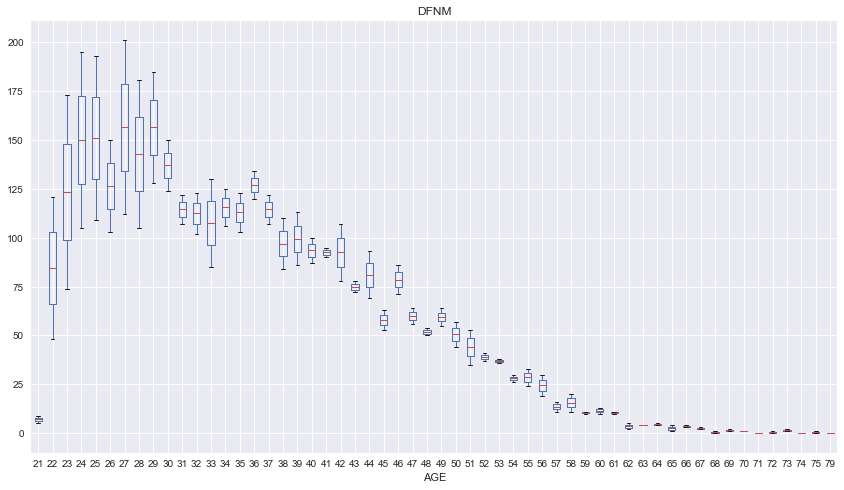

In [31]:
#Create boxplot to show number of defaults rate by sex at each age
plt.rcParams["figure.figsize"] = (14,8)
dflts.boxplot('DFNM','AGE')
plt.suptitle('')

By absolute numbers, most defaults are occurring with the very youngest populations. A high number of defaults persists through age 37, after which, the raw number of defaults decreases.

In [32]:
#pivot table of total loan amounts by sex and age group
sag = dfraw.pivot_table(values=["LIMIT_BAL"], index=['AGE','SEX'], aggfunc=np.sum).unstack()
print (sag)

       LIMIT_BAL             
SEX            1            2
AGE                          
21      410000.0    1150000.0
22     4470000.0   16770000.0
23    10640000.0   44990000.0
24    17720000.0   67550000.0
25    28830000.0   93010000.0
26    50540000.0  111250000.0
27    66180000.0  152330000.0
28    77740000.0  163120000.0
29   105940000.0  182000000.0
30    98150000.0  166330000.0
31    90750000.0  145050000.0
32    93530000.0  138530000.0
33    84200000.0  141350000.0
34    92860000.0  138830000.0
35    83330000.0  137370000.0
36    76230000.0  140070000.0
37    84900000.0  123890000.0
38    77490000.0  104630000.0
39    81330000.0  115080000.0
40    66500000.0   97450000.0
41    65070000.0   91220000.0
42    61417680.0   87830000.0
43    49500000.0   71670000.0
44    55870000.0   74750000.0
45    43300000.0   63260000.0
46    42726000.0   57490000.0
47    36360000.0   47770000.0
48    35870000.0   42746000.0
49    38880000.0   38920000.0
50    32680000.0   41650000.0
51    2730

In [33]:
#examine variable correlations
corrmat = dfraw.corr()
print(corrmat)

                 ID  LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
ID         1.000000   0.026179  0.018678   0.019389   0.017982   0.024354   
LIMIT_BAL  0.026179   1.000000  0.144713   0.285430   0.278314   0.283236   
AGE        0.018678   0.144713  1.000000   0.056239   0.054283   0.053710   
BILL_AMT1  0.019389   0.285430  0.056239   1.000000   0.951484   0.892279   
BILL_AMT2  0.017982   0.278314  0.054283   0.951484   1.000000   0.928326   
BILL_AMT3  0.024354   0.283236  0.053710   0.892279   0.928326   1.000000   
BILL_AMT4  0.040351   0.293988  0.051353   0.860272   0.892482   0.923969   
BILL_AMT5  0.016705   0.295562  0.049345   0.829779   0.859778   0.883910   
BILL_AMT6  0.016730   0.290389  0.047613   0.802650   0.831594   0.853320   
PAY_AMT1   0.009742   0.195236  0.026147   0.140277   0.280365   0.244335   
PAY_AMT2   0.008406   0.178408  0.021785   0.099355   0.100851   0.316936   
PAY_AMT3   0.039151   0.210167  0.029247   0.156887   0.150718   0.130011   

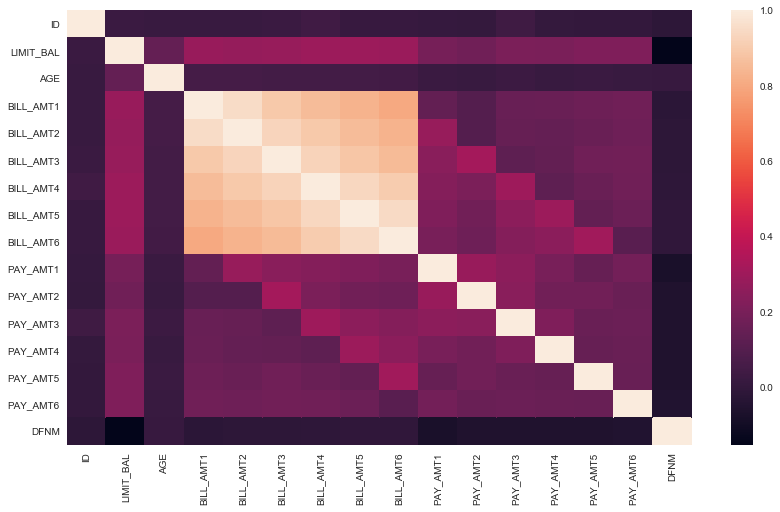

In [34]:
sns.heatmap(corrmat)